Load Image

In [1]:
!wget 'https://drive.google.com/uc?id=1oksbHbYVVbgzZLcGLe6pCKg1s09IGyLW' -O board1.jpg

'https://drive.google.com/uc?id=1oksbHbYVVbgzZLcGLe6pCKg1s09IGyLW': Scheme missing.


### SOL 1

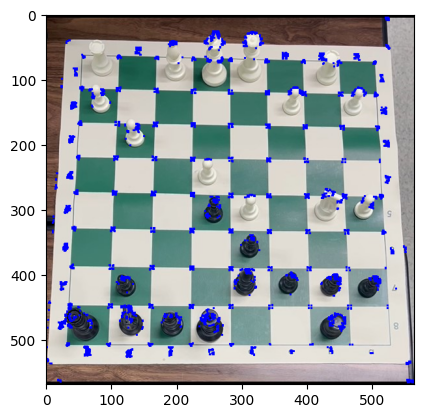

In [166]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

def sobel(src_image, kernel_size):
    grad_x = cv.Sobel(src_image, cv.CV_16S, 1, 0, ksize=kernel_size, scale=1,
                      delta=0, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(src_image, cv.CV_16S, 0, 1, ksize=kernel_size, scale=1,
                      delta=0, borderType=cv.BORDER_DEFAULT)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)

    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    return grad

def process_image(src_image_path):
    # load the image
    src_image = cv.imread(src_image_path)
    # convert to RGB (otherwise when you display this image the colors will look incorrect)
    src_image = cv.cvtColor(src_image, cv.COLOR_BGR2RGB)
    # convert to grayscale before attempting corner detection
    src_gray = cv.cvtColor(src_image, cv.COLOR_BGR2GRAY)

    # standard technique to eliminate noise
    blur_image = cv.blur(src_gray,(3,3))

    # strengthen the appearance of lines in the image
    sobel_image = sobel(blur_image, 3)

    # detect corners
    corners = cv.cornerHarris(sobel_image, 2, 3, 0.04)
    # for visualization to make corners easier to see
    corners = cv.dilate(corners, None)

    # overlay on a copy of the source image
    dest_image = np.copy(src_image)
    dest_image[corners>0.01*corners.max()]=[0,0,255]
    return dest_image

src_image_path = "board1.jpg"
dest_image = process_image(src_image_path)
plt.imshow(dest_image)
plt.show()

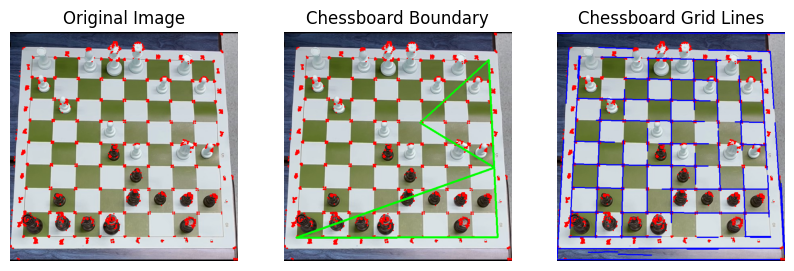

In [167]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = dest_image
image = dest_image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Detect edges using Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Step 2: Find contours to detect the chessboard boundary
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Approximate the largest contour to a polygon (assuming it's the chessboard)
chessboard_contour = contours[0]
epsilon = 0.02 * cv2.arcLength(chessboard_contour, True)
approx_corners = cv2.approxPolyDP(chessboard_contour, epsilon, True)

# Draw the detected chessboard boundary
image_with_edges = image.copy()
cv2.drawContours(image_with_edges, [approx_corners], -1, (0, 255, 0), 3)

# Step 3: Use Hough Line Transform to detect the grid lines
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

# Draw the lines
image_with_lines = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Chessboard Boundary')
plt.imshow(cv2.cvtColor(image_with_edges, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Chessboard Grid Lines')
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

### SOL 2

GREY SCALE & BLURRING

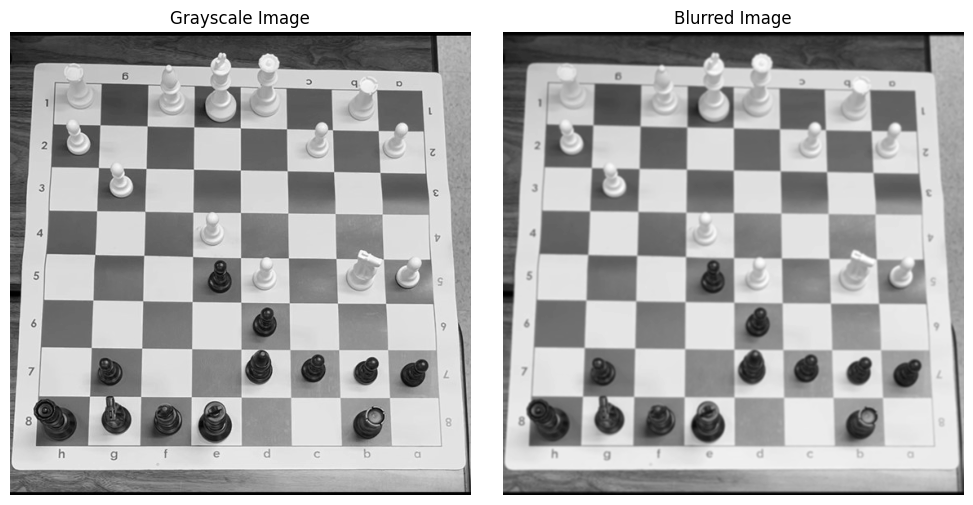

In [255]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'board1.jpg'
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


OTSU Threshold

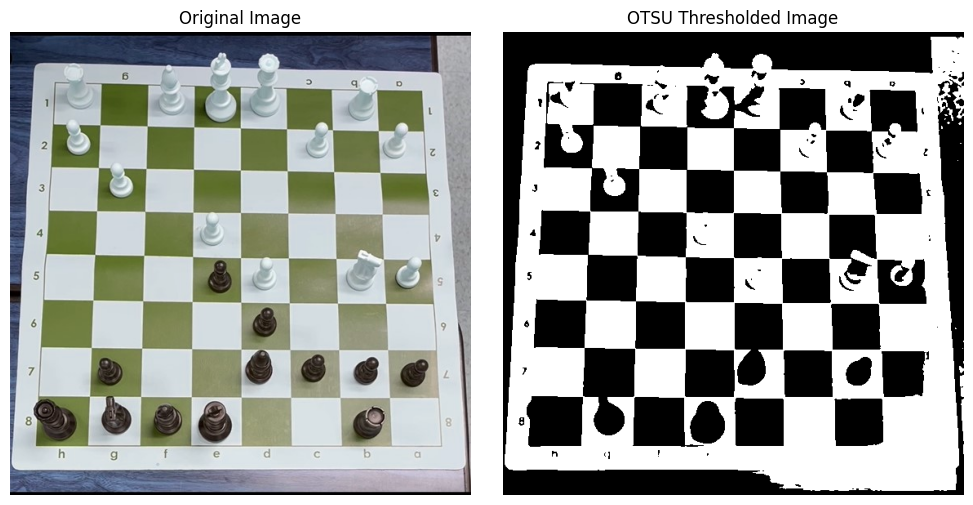

In [256]:
import cv2
import matplotlib.pyplot as plt


# Apply OTSU thresholding
_, otsu_thresholded = cv2.threshold(blurred_image, 165, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("OTSU Thresholded Image")
plt.imshow(otsu_thresholded, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


CANNY EDGE DETECTION

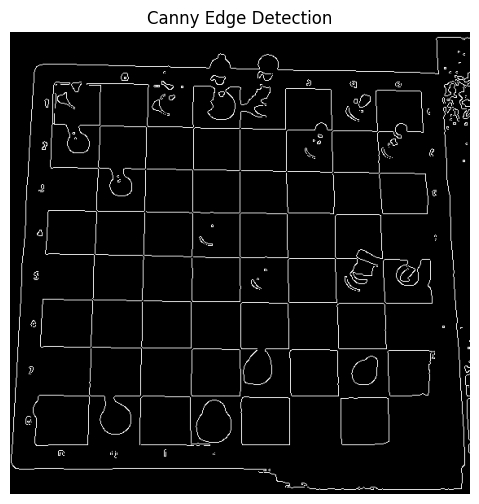

In [257]:
# Apply Canny edge detection on the blurred image
edges = cv2.Canny(otsu_thresholded, threshold1=50, threshold2=150)

# Display the edge-detected image
plt.figure(figsize=(6, 6))
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


Dilation / Erosion (Not Use)

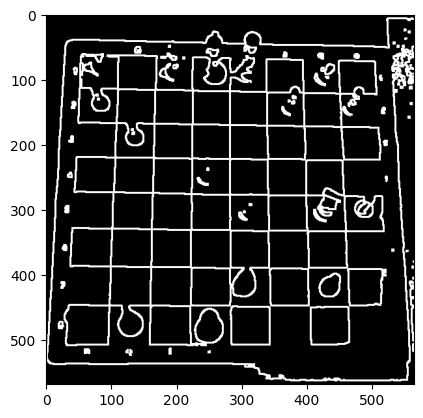

In [258]:
kernel = np.ones((3, 3), np.uint8)

img_dilation = cv2.dilate(edges, kernel, iterations=1)

plt.imshow(img_dilation,cmap="gray")

HOUGH TRANSFORM MADE GRID(not use)

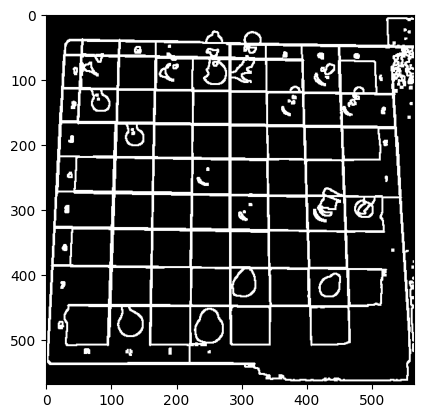

In [ ]:
lines = cv2.HoughLinesP(img_dilation, 1, np.pi/180, threshold=200, minLineLength=100, maxLineGap=25)
img_hough = img_dilation

if lines is not None:
    for i, line in enumerate(lines):
        x1, y1, x2, y2 = line[0]

        # draw lines
        cv2.line(img_hough, (x1, y1), (x2, y2), (255,255,255), 2)

plt.imshow(img_hough,cmap="gray")

Erosion

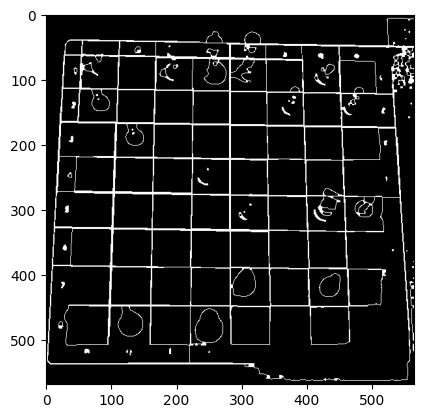

In [334]:
kernel = np.ones((3, 3), np.uint8)

img_dilation2 = cv2.erode(img_hough, kernel, iterations=1)

plt.imshow(img_dilation2,cmap="gray")

HOUGH TRANFORM RED LINE

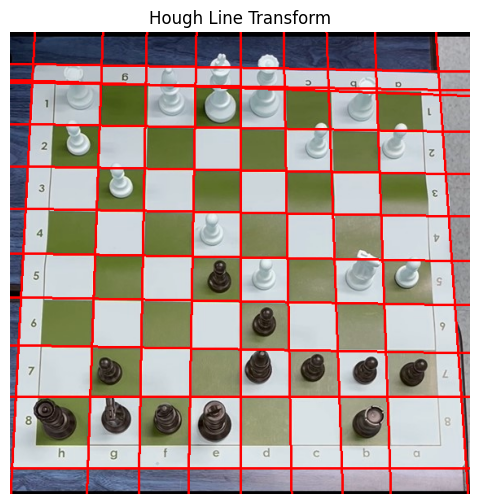

In [ ]:
# Apply Hough Line Transform on the edges
lines = cv2.HoughLines(img_dilation2, rho=1, theta=np.pi/180, threshold=250)


# Create a copy of the original image to draw lines
hough_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Draw the detected lines on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(hough_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the Hough Transform result
image_with_red_lines = cv2.cvtColor(hough_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.title('Hough Line Transform')
plt.imshow(image_with_red_lines)
plt.axis('off')
plt.show()

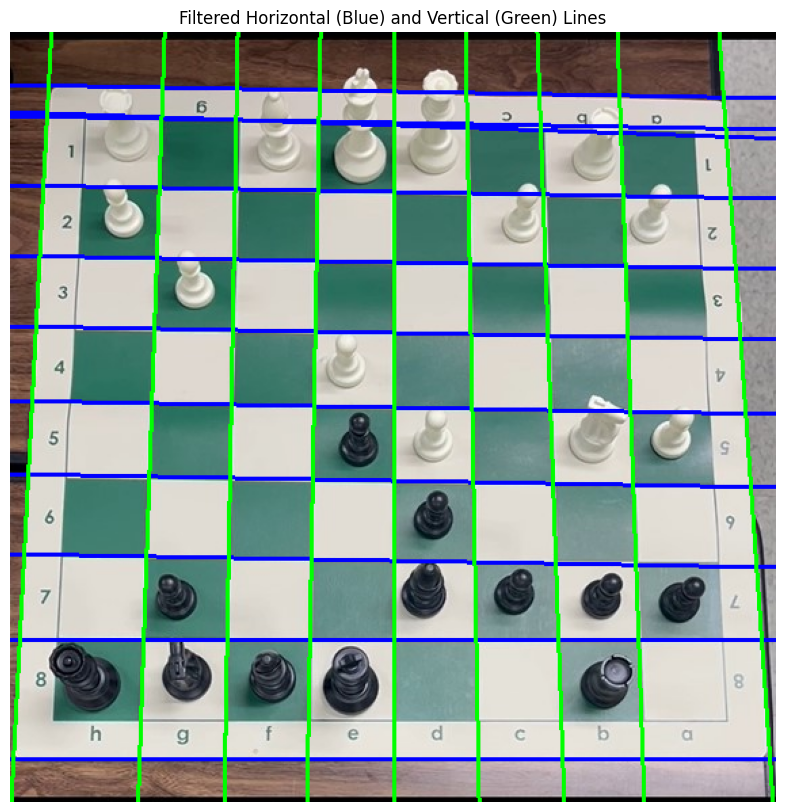

In [262]:
# Filter out diagonal lines by refining angle ranges for horizontal and vertical classification
horizontal_lines = []
vertical_lines = []

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        # Horizontal: angle close to 90 degrees (pi/2 in radians)
        if np.pi / 2 - 0.1 <= theta <= np.pi / 2 + 0.1:
            horizontal_lines.append((rho, theta))
        # Vertical: angle close to 0 or 180 degrees (0 or pi in radians)
        elif theta <= 0.1 or theta >= np.pi - 0.1:
            vertical_lines.append((rho, theta))

# Visualize the filtered horizontal and vertical lines
line_image_filtered = image_with_red_lines.copy()

# Draw horizontal lines
for rho, theta in horizontal_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(line_image_filtered, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue for horizontal

# Draw vertical lines
for rho, theta in vertical_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(line_image_filtered, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for vertical

# Display the filtered image with only horizontal and vertical lines
plt.figure(figsize=(10, 10))
plt.title("Filtered Horizontal (Blue) and Vertical (Green) Lines")
plt.imshow(cv2.cvtColor(line_image_filtered, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Intersection Point

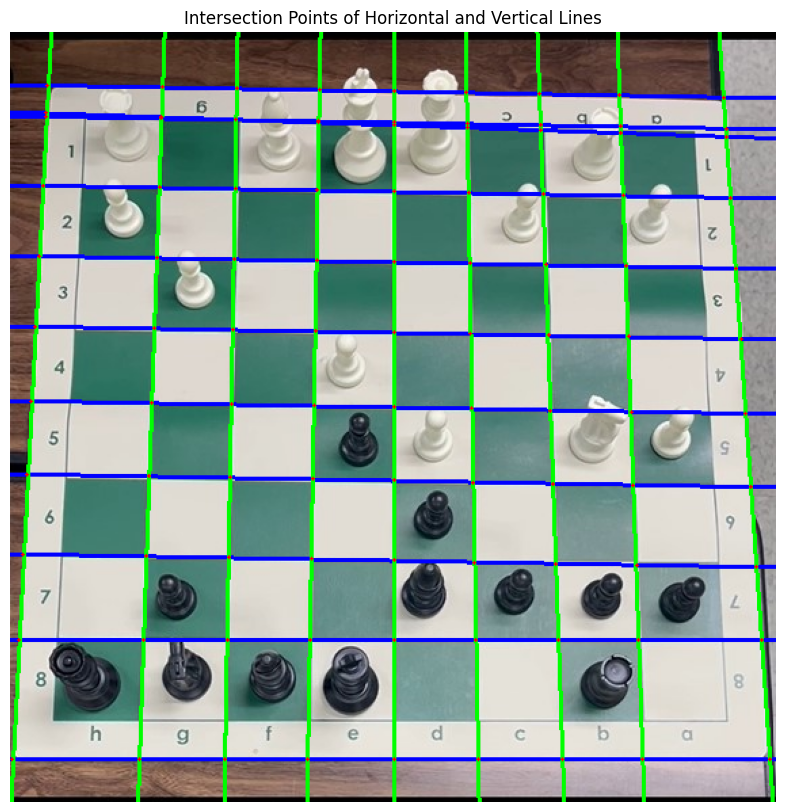

In [362]:
# Find intersection points between horizontal (blue) and vertical (green) lines
intersection_points = []

for rho_h, theta_h in horizontal_lines:
    for rho_v, theta_v in vertical_lines:
        # Calculate the intersection of a horizontal and a vertical line
        a_h = np.cos(theta_h)
        b_h = np.sin(theta_h)
        a_v = np.cos(theta_v)
        b_v = np.sin(theta_v)

        determinant = a_h * b_v - b_h * a_v
        if abs(determinant) > 1e-10:  # Ensure lines are not parallel
            x = (b_v * rho_h - b_h * rho_v) / determinant
            y = (a_h * rho_v - a_v * rho_h) / determinant
            intersection_points.append((int(x), int(y)))

# Visualize the intersection points on the original image
intersection_image = line_image_filtered.copy()
for x, y in intersection_points:
    cv2.circle(intersection_image, (x, y), 1, (0, 0, 255), -1)  # Red circles

# Display the image with intersection points
plt.figure(figsize=(10, 10))
plt.title("Intersection Points of Horizontal and Vertical Lines")
plt.imshow(cv2.cvtColor(intersection_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


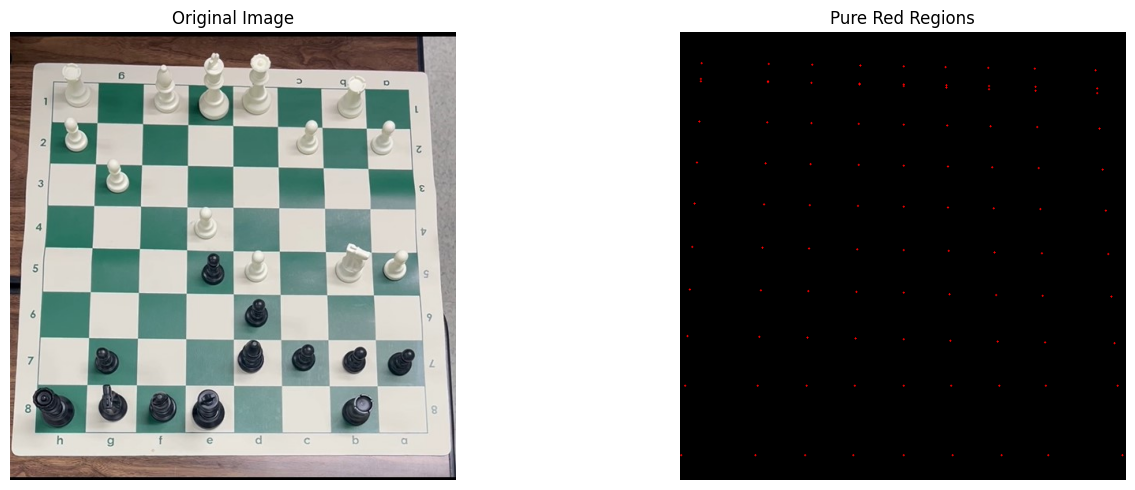

In [363]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Define the exact BGR value for pure red
pure_red = np.array([0, 0, 255])  # Pure red in BGR

# Create a mask for pure red pixels
mask = cv2.inRange(intersection_image, pure_red, pure_red)

# Apply the mask to the original image
red_regions = cv2.bitwise_and(intersection_image, intersection_image, mask=mask)

# Display the result
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Pure Red Regions")
plt.imshow(cv2.cvtColor(red_regions, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

Corner

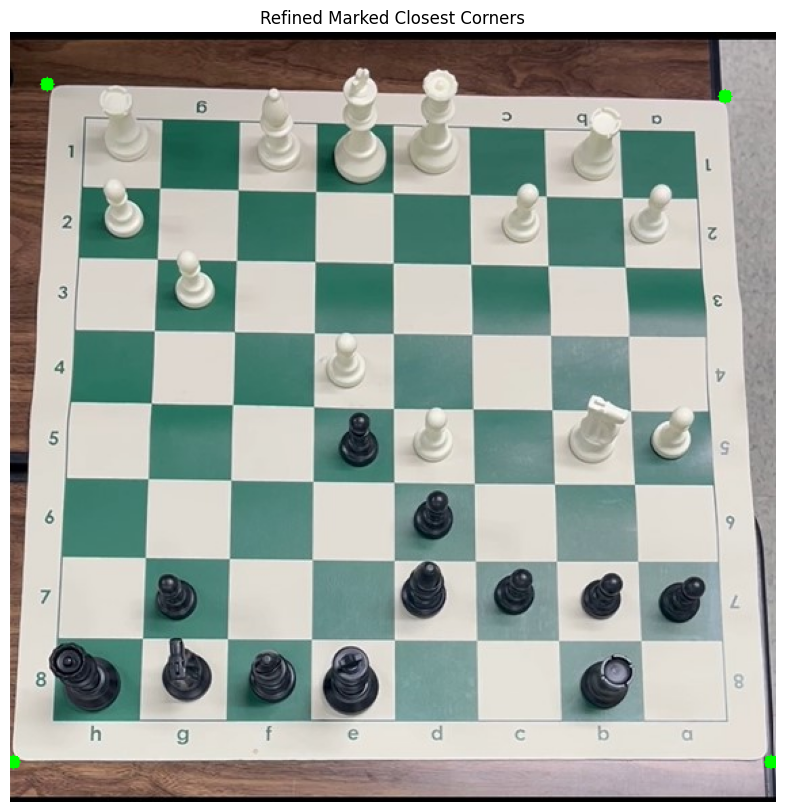

[[27, 38], [527, 47], [2, 538], [561, 538]]


In [383]:
import cv2
import numpy as np

# Load the image
gray = cv2.cvtColor(red_regions, cv2.COLOR_BGR2GRAY)

# Detect corners using Harris Corner Detector
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Threshold to detect strong corners
threshold = 0.01 * dst.max()
corners = np.argwhere(dst > threshold)

# Find the corners closest to the image corners
height, width = gray.shape

# Define the four corners of the image
image_corners = [
    (0, 0),               # Top-left
    (0, height - 1),       # Top-right 0, width - 1
    (width - 1, 0),      # Bottom-left height - 1, 0
    (height - 1, width - 1)  # Bottom-right
]

# Refine the logic to ensure marking exactly on the red dots
refined_corners = []
for corner in image_corners:
    # Find the closest detected corner for each image corner
    distances = np.linalg.norm(corners - np.array(corner), axis=1)
    closest_idx = np.argmin(distances)
    refined_corners.append(corners[closest_idx])

# Create a copy of the image to draw refined points
refined_marked_image = image.copy()

# Draw circles at the refined closest corners
for corner in refined_corners:
    cv2.circle(refined_marked_image, (corner[1], corner[0]), radius=5, color=(0, 255, 0), thickness=-1)

# Swap corner[0] with corner[1] for each corner
refined_corners = [[corner[1], corner[0]] for corner in refined_corners]

# Display the refined result
plt.figure(figsize=(10, 10))
plt.title("Refined Marked Closest Corners")
plt.imshow(cv2.cvtColor(refined_marked_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(refined_corners)

CROP

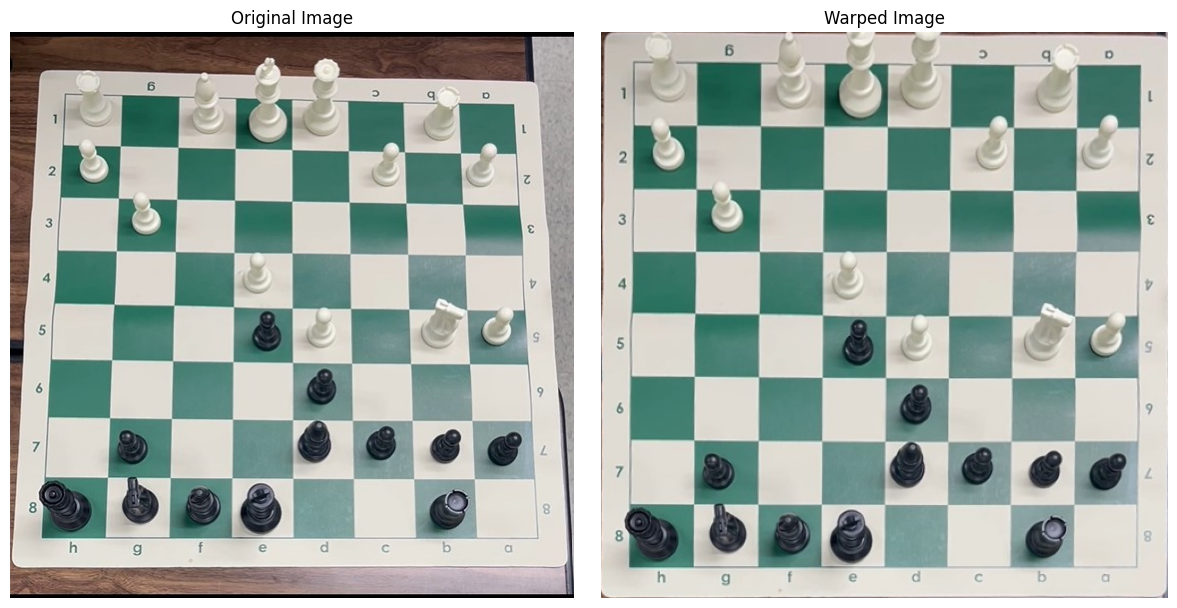

In [384]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

refined_corners = np.float32(refined_corners)

# Define the four points in the original image (source points)
src_points = refined_corners

# Define the points where these should map to in the output image (destination points)
dst_points = np.float32([
    [0, 0],                # Top-left corner
    [500, 0],              # Top-right corner
    [0, 500],              # Bottom-left corner
    [500, 500]             # Bottom-right corner
])

# Compute the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Apply the perspective warp
output_size = (500, 500)  # Width and height of the output image
warped_image = cv2.warpPerspective(image, matrix, output_size)

# Display the original and warped images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Warped Image")
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()
